### PROYECTO INTEGRADOR - 201902

- Karen Lizeth Velásquez Moná
- Ana María Uran González
- Daniel Román Ramírez
- Daniel Enrique Pinto Restrepo
- Carlos Alberto Cerro Espinal




## Segmentación de clientes según su transaccionalidad

Actualmente el sistema financiero cuenta con una penetración de tarjetas de crédito del 57,3% en la población bancarizada de Colombia, según estudio realizado por la compañía Minsait por medio de su informe Tendencias en Medios de Pago 2018. Lo cual lleva a la industria a tener grandes retos a nivel de facturación y mejoramiento del servicio, fomentando el uso del dinero plástico. De acuerdo a información de la Superintendencia Financiera de Colombia, el país cuenta con alrededor de 15 millones de plásticos vigentes emitidos, siendo el cuarto país entre 18 países latinoamericanos con mayor número de plásticos.

Tomando una muestra de clientes de una entidad bancaria, se quiere identificar segmentos para desarrollar estrategias particulares dependiendo de las características de cada grupo. Estas estrategias pueden ser de fidelización a largo plazo, adquisición de nuevos servicios, aumento de frecuencia del uso de tarjeta de crédito, entre otras.

## Objetivo

- Segmentar los clientes por su historial de transaccionalidad con la entidad
- Estimar qué variables inciden en el aumento de la frecuencia de transacciones

## Argumentación 

Hoy en día para cualquier empresa, segmentar es una manera de dividir un problema en partes más sencillas que ayuda a priorizar esfuerzos y a localizar oportunidades de negocio.

Se puede evidenciar que no todos los clientes son iguales ni tienen las mismas capacidades adquisitivas por lo tanto, es importante entender e identificar valor de grupos de individuos.

# Metodología

Con el objetivo de identificar los grupos de personas y saber cuáles son las caractirísticas principales de los consumidores, se tiene en cuenta lo siguiente:

- Metodologia FMR
- Segmetanción K- Means
- Segmetanción K - Medoids (PAM )
- Análisis de resultados por segmentos


# Definiciones

## Segmentación FMR 

![Segmentacin FRM](Piramide.png)


RFM es uno de los métodos de segmentación de clientes más sencillos de implantar, y al mismo tiempo uno de los que mejores resultados aportan a corto plazo. Se basa en el célebre principio de Pareto, según la cual el 20% de los clientes de una compañía generan el 80% de los ingresos. El RFM es la mejor manera de constatar hasta qué punto este paradigma es real en nuestro caso, y ubicar a cada cliente en su escalón de la pirámide de valor.


El análisis consiste en clasificar a los clientes por su valor en función de tres variables:

- Recencia. Días transcurridos desde la última compra.

- Frecuencia. Número de compras por período de tiempo, como promedio. Por ejemplo, número de compras mensuales.

- Money. Valor de las compras totales realizadas por el cliente en el tiempo de análisis.

## Construcción de percentiles 

 Se construyen  escalas, basadas en estas variables, dando a cada cliente un valor según el percentil en que se encuentra (percentiles = n grupos de igual tamaño, o cantidad de clientes). Lo más habitual es trabajar con 5 valores (quintiles), aunque no es raro el uso de 10 valores (deciles).
 
Por ejemplo, un cliente que estuviera entre el 20% de los que más recientemente han comprado, en el 2do 20% por frecuencia de compra y el 4to 20% en valor total de compras, se le asignaría el segmento 124,  (R)5 (F)4 (M)2. Lo vemos en el gráfico:

![](segmentos.png)

El gráfico siguiente muestra cómo se distribuye la venta de una enseña de comercio minorista, en función del segmento de valor monetario M al que pertenecen los clientes. Efectivamente, refleja la distribución 20/80.

Referencia: https://www.unica360.com/analisis-rfm-en-retail-empezando-a-segmentar-clientes-i

## Desarrollo

In [4]:
import csv
import pandas as pd
import numpy as np
from IPython.display import Image


In [55]:
from sklearn import preprocessing
from functools import reduce

In [56]:
datosp=pd.read_csv('bd_clean.csv',sep=';', index_col=0) #Carga datos
datosp.reset_index(inplace = True)

datosp.head(10)

,Cliente_Id,Sexo,Estrato,Grupo_valor,Rango_ingresos_acum,Nivel_estudio,Estado_civil,Departamento,Edad,Franquicia,...,cnt_trx_201901,cnt_trx_201902,cnt_trx_201903,cnt_trx_201904,cnt_trx_201905,cnt_trx_201906,Total_trx,Recency,Outliers,Mahal Distance
0,8751606,F,6,Alto,84000000,Pregrado,CASADO,BOGOTA D.C.,52,VISA,...,8,4,3,2,3,3,150,0,0,0.816140055
1,34016703,F,4,Alto,75000000,Especializacion,SOLTERO,ANTIOQUIA,31,VISA,...,3,3,3,2,2,0,43,1,0,11.912.339.010.917.400
2,14303657,F,4,Alto,69000000,Especializacion,SOLTERO,BOGOTA D.C.,46,VISA,...,2,5,0,0,0,0,66,4,0,0.480777346
3,25568447,F,4,Alto,66000000,Especializacion,SOLTERO,ANTIOQUIA,31,VISA,...,0,0,0,0,0,0,175,16,0,1.886.263.802.957.900
4,22376987,F,4,Alto,64500000,Especializacion,CASADO,BOGOTA D.C.,43,VISA,...,3,4,0,3,3,3,41,0,0,11.562.337.962.162.000
5,15822958,M,4,Alto,63000000,Maestria,CASADO,BOGOTA D.C.,44,VISA,...,0,0,0,0,0,0,458,6,0,1.334.529.586.269.320
6,21684620,M,5,Alto,61500000,Maestria,CASADO,BOGOTA D.C.,60,AMEX,...,0,0,0,0,0,0,38,12,0,12.221.128.145.126.800
7,35582763,M,5,Alto,60000000,Especializacion,SOLTERO,BOGOTA D.C.,63,VISA,...,0,0,0,0,0,0,14,8,0,1.463.316.207.739.910
8,39437695,M,4,Alto,60000000,Especializacion,CASADO,BOGOTA D.C.,60,VISA,...,5,2,2,17,19,1,130,0,0,1.310.675.450.475.790
9,1096148,M,6,Alto,60000000,Especializacion,CASADO,CUNDINAMARCA,54,VISA,...,0,0,0,0,0,0,85,13,0,1.062.722.373.061.000


Para crear el modelo FMR, es necesario identificar los  percentiles a los que  pertenece cada cliente, viendo de manera individual su frecuencia,monto trasado,y Recencia(tiempo transcurrido en meses desde su última compra).

In [57]:
Trx=datosp.Total_trx.quantile([0.2,0.4,0.6,0.8,1]).values.tolist()
Monto=datosp.Monto_transado.quantile([0.2,0.4,0.6,0.8,1]).values.tolist()
Rec=datosp.Recency.quantile([0.2,0.4,0.6,0.8,1]).values.tolist()

Definimos  una calificación a cada cliente por  pertenecer a cada  uno de los  rangos  del percentil

In [58]:
Frecuency=[]
Money=[]
Rcency=[]

for i in range(0,len(datosp)):
    if np.array(datosp.Total_trx)[i]<=Trx[0]:
        F=1
    elif np.array(datosp.Total_trx)[i]<=Trx[1]:
        F=2
    elif np.array(datosp.Total_trx)[i]<=Trx[2]:  
        F=3
    elif np.array(datosp.Total_trx)[i]<=Trx[3]: 
        F=4
    else:
        F=5
    Frecuency.append(F)

for i in range(0,len(datosp)):
    if np.array(datosp.Monto_transado)[i]<=Monto[0]:
        M=1
    elif np.array(datosp.Monto_transado)[i]<=Monto[1]:
        M=2
    elif np.array(datosp.Monto_transado)[i]<=Monto[2]:  
        M=3
    elif np.array(datosp.Monto_transado)[i]<=Monto[3]:
        M=4
    else:
        M=5
    Money.append(M)
    
for i in range(0,len(datosp)):
    if np.array(datosp.Recency)[i]<=Rec[0]:
        R=5
    elif np.array(datosp.Recency)[i]<=Rec[1]:
        R=4
    elif np.array(datosp.Recency)[i]<=Rec[2]:  
        R=3
    elif np.array(datosp.Recency)[i]<=Rec[3]: 
        R=2
    else:
        R=1
    Rcency.append(R)

datosp['Frecuency']=Frecuency
datosp['Money']=Money
datosp['Rcency']=Rcency

## Calculamos el score RFM

In [59]:
datosp['RFM']=datosp.Frecuency*datosp.Money*datosp.Rcency
datosp.head()

,Cliente_Id,Sexo,Estrato,Grupo_valor,Rango_ingresos_acum,Nivel_estudio,Estado_civil,Departamento,Edad,Franquicia,...,cnt_trx_201905,cnt_trx_201906,Total_trx,Recency,Outliers,Mahal Distance,Frecuency,Money,Rcency,RFM
0,8751606,F,6,Alto,84000000,Pregrado,CASADO,BOGOTA D.C.,52,VISA,...,3,3,150,0,0,0.816140055,4,5,5,100
1,34016703,F,4,Alto,75000000,Especializacion,SOLTERO,ANTIOQUIA,31,VISA,...,2,0,43,1,0,11.912.339.010.917.400,2,4,3,24
2,14303657,F,4,Alto,69000000,Especializacion,SOLTERO,BOGOTA D.C.,46,VISA,...,0,0,66,4,0,0.480777346,3,4,3,36
3,25568447,F,4,Alto,66000000,Especializacion,SOLTERO,ANTIOQUIA,31,VISA,...,0,0,175,16,0,1.886.263.802.957.900,4,5,1,20
4,22376987,F,4,Alto,64500000,Especializacion,CASADO,BOGOTA D.C.,43,VISA,...,3,3,41,0,0,11.562.337.962.162.000,2,5,5,50


Calculamos  los percentiles del score RFM

In [60]:
RFM_perc=datosp.RFM.quantile([0.2,0.4,0.6,0.8,1]).values.tolist()
RFM_perc

[6.0, 16.0, 30.0, 60.0, 125.0]

In [61]:
Percentil=[]
for i in range(0,len(datosp)):
    if np.array(datosp.RFM)[i]<=RFM_perc[0]:
        P=1
    elif np.array(datosp.RFM)[i]<=RFM_perc[1]:
        P=2
    elif np.array(datosp.RFM)[i]<=RFM_perc[2]:  
        P=3
    elif np.array(datosp.RFM)[i]<=RFM_perc[3]: 
        P=4
    else:
        P=5
    Percentil.append(P)
datosp['Percentil_RFM']=Percentil

In [62]:
datosp.head()

,Cliente_Id,Sexo,Estrato,Grupo_valor,Rango_ingresos_acum,Nivel_estudio,Estado_civil,Departamento,Edad,Franquicia,...,cnt_trx_201906,Total_trx,Recency,Outliers,Mahal Distance,Frecuency,Money,Rcency,RFM,Percentil_RFM
0,8751606,F,6,Alto,84000000,Pregrado,CASADO,BOGOTA D.C.,52,VISA,...,3,150,0,0,0.816140055,4,5,5,100,5
1,34016703,F,4,Alto,75000000,Especializacion,SOLTERO,ANTIOQUIA,31,VISA,...,0,43,1,0,11.912.339.010.917.400,2,4,3,24,3
2,14303657,F,4,Alto,69000000,Especializacion,SOLTERO,BOGOTA D.C.,46,VISA,...,0,66,4,0,0.480777346,3,4,3,36,4
3,25568447,F,4,Alto,66000000,Especializacion,SOLTERO,ANTIOQUIA,31,VISA,...,0,175,16,0,1.886.263.802.957.900,4,5,1,20,3
4,22376987,F,4,Alto,64500000,Especializacion,CASADO,BOGOTA D.C.,43,VISA,...,3,41,0,0,11.562.337.962.162.000,2,5,5,50,4


## Clasificación modelo PAM (Partitioning Around Medoids)

K-medoids es un método de clustering muy similar a K-means ya que ambos agrupan las observaciones en K clusters, donde K es un valor preestablecido por quien lo estudio. La diferencia es que, en K-medoids, cada cluster está representado por una observación presente en el cluster (medoid), mientras que en K-means cada cluster está representado por su centroide, que se corresponde con el promedio de todas las observaciones del cluster pero con ninguna en particular.

Específicamente la definición de metoid es el elemento dentro de un cluster cuya distancia (diferencia) promedio entre él y todos los demás elementos del mismo cluster es lo menor posible. Se corresponde con el elemento más central del cluster y por lo tanto puede considerarse como el más representativo. El hecho de utilizar medoids en lugar de centroides hace de K-medoids un método más robusto que K-means, viéndose menos afectado por outliers o ruido. A modo de idea intuitiva puede considerarse como la analogía entre media y mediana.

## Pasos para el desarrollo del modelo

- Seleccionar K observaciones aleatorias como medoids iniciales.

- Calcular la matriz de distancia entre todas las observaciones

- Asignar cada observación a su medoid más cercano Para cada uno de los clusters creados, comprobar si seleccionando otra observación como medoid se consigue reducir la distancia del cluster, si esto ocurre, seleccionar la observación que consigue una mayor reducción como nuevo medoid.

- Si al menos un medoid ha cambiado en el paso 4, volver al paso 3, de lo contrario, se termina el proceso.

Referencia: https://rpubs.com/Joaquin_AR/310338

A continuación se realizará la selección de variables númericas y categóricas

In [63]:
#Quitamos los datos que no hacen parte de la muestra
dfp = datosp

### Selección variables numéricas

In [64]:
#Percentil = 1 # K -cluster
Percentil = 3 # K -cluster = 3

In [65]:
dfp = dfp[dfp['Percentil_RFM'] == Percentil]

In [66]:
dfpnum = pd.DataFrame(datosp[['Rango_ingresos_acum','Edad','Reclamos','RFM']])

#### Estandarización de datos numéricos

In [67]:
mm_scaler = preprocessing.MinMaxScaler()

In [68]:
def normalize_function(dfpnum):
    mm_scaler = preprocessing.MinMaxScaler()
    df_minmax = pd.DataFrame(dmm_scaler.fit_transform(dfpnum[['Rango_ingresos_acum','Edad','Reclamos','RFM']]), columns=dfpnum.columns)
    return(df_minmax)

In [69]:
df_minmax = pd.DataFrame(mm_scaler.fit_transform(dfpnum[['Rango_ingresos_acum','Edad','Reclamos','RFM']]), columns=dfpnum.columns)

D:\Usuarios\danirorm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [70]:
df_minmax['id'] = dfp['Cliente_Id']

### Selección variables categoricas

In [71]:
dfp['Estrato'] = dfp['Estrato'].astype(str)

D:\Usuarios\danirorm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
dfpcat = pd.DataFrame(dfp[['Sexo','Estrato','Grupo_valor','Nivel_estudio','Estado_civil','Departamento','Franquicia','canal','origen','RFM','Percentil_RFM']])

Convertimos las variables categoricas a dummie

In [73]:
dfpcat = pd.get_dummies(dfpcat)
dfpcat['id'] = dfp['Cliente_Id']


In [74]:
dfpcat.head()

,RFM,Percentil_RFM,Sexo_F,Sexo_M,Estrato_1,Estrato_2,Estrato_3,Estrato_4,Estrato_5,Estrato_6,...,Departamento_SANTIAGO DE CALI,Departamento_VALLE DEL CAUCA,Franquicia_AMEX,Franquicia_MASTER,Franquicia_VISA,canal_I,canal_P,origen_Internacional,origen_Nacional,id
1,24,3,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,34016703
3,20,3,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,25568447
20,25,3,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,14910521
24,25,3,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,21313568
45,30,3,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,22380270


In [75]:
sample = pd.merge(df_minmax,dfpcat,how='inner',left_on=['id'],right_on=['id'])

In [76]:
sample0 = pd.merge(df_minmax,dfpcat,how='inner',left_on=['id'],right_on=['id'])

In [77]:
sample1 = sample

In [78]:
sample2 = sample1.drop(['id'], axis='columns', inplace=True)

In [79]:
from sklearn import preprocessing
from functools import reduce

In [80]:
! pip install pyclustering

  Running setup.py bdist_wheel for pyclustering: started
  Running setup.py bdist_wheel for pyclustering: finished with status 'done'
  Stored in directory: D:\Usuarios\danirorm\AppData\Local\pip\Cache\wheels\64\8c\62\f45c1df20df691f3dfb2c71be53660cf5d46a98f5c3fa53cec
Successfully built pyclustering


In [81]:
from pyclustering.cluster.kmedoids import kmedoids

In [82]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

In [83]:
sample = sample.values.tolist()

In [84]:
from pyclustering.cluster.kmedoids import kmedoids
import random
random.seed(131)

def kmedoids_eval(max_clusters,data):
    points=list(range(0,100))
    initial_centers =sorted(random.sample(points,max_clusters))
    # Create instance of K-Means algorithm with prepared centers.
    kmedoids_instance = kmedoids(data, initial_centers)
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    locations= kmedoids_instance.get_medoids()
    representatives=[]
    for k in range(0,len(locations)):
        representatives1=list(sample[locations[k]])
        representatives.append(representatives1)   
    distan=[]
    for i in range(0,max_clusters):
        clust1=clusters[i]
        bsas1=[]
        for j in range(0,len(clust1)):
            sam=list(set(data[j])-set(representatives[i]))
            dist=sum(power(sam,2))**(1/2)
            bsas1.append(dist)
            
        dist1=sum(bsas1)/len(bsas1)
        distan.append(dist1)
    return [max_clusters,0,round(sum(distan),5)]   


In [85]:
def power(my_list,a):
    return [ x**a for x in my_list ]

In [86]:
m_clust=list(range(4,30))

In [87]:
resultado_def = []
vals3=[]
for m in range(0,(len(m_clust))):
    res=kmedoids_eval(m_clust[m],sample)
    vals3.append(res)
resultado = pd.DataFrame(vals3, columns =['N_clust','Umbral','Distancia']) 
resultado3=resultado[resultado['Distancia']==resultado['Distancia'].min()]
resultado3['metodo']='kmedoids'
resultado_def=resultado_def.append(resultado3)

D:\Usuarios\danirorm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
resultado

,N_clust,Umbral,Distancia
0,4,0,76.60538
1,5,0,100.95158
2,6,0,132.67327
3,7,0,133.74986
4,8,0,142.21445
5,9,0,172.61688
6,10,0,203.84044
7,11,0,229.27424
8,12,0,222.56943
9,13,0,255.90288


In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

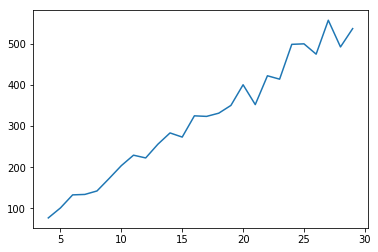

In [90]:
plt.plot(resultado['N_clust'].values,resultado['Distancia'].values) # con el percentil 3, k=5, es la segmentación optima

In [91]:
def kmedoids_alg(n_clusters,data):
    points=list(range(0,30))
    initial_centers =sorted(random.sample(points,n_clusters))
    # Create instance of K-Means algorithm with prepared centers.
    instance_method = kmedoids(data, initial_centers)
    instance_method.process()
    clusters =instance_method.get_clusters()
    clust=[]
    for i in range(0,n_clusters):
        clust1=clusters[i]
        for j in range(0,len(clust1)):
            clust2=[i,clust1[j]]
            clust.append(clust2)
    c_list=np.vstack(clust)
    clust_list=pd.DataFrame({'GRUPO': c_list[:, 0], 'id': c_list[:, 1]})
    clust_list.sort_values(by=['id'], ascending=[1], inplace=True)
    clust_list['Cliente_Id']=df['Cliente_Id']
    clust_list=clust_list[['GRUPO','Cliente_Id']]
    clust_list.sort_values(by=['GRUPO'], ascending=[1], inplace=True)
    return(clust_list)

In [92]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [93]:
df=datosp

## Segmentación mediante el uso de K-MEANS


Segmentar es dividir una población en grupos homogéneos en función de necesidades, comportamientos, características o actitudes y caracterizar a los grupos resultantes para saber qué les distingue entre sí.

Dado un conjunto de observaciones \begin{equation*} (X_1, X_2, …, X_n)\end{equation*} 

donde cada observación es un vector real de d dimensiones, k-medias construye una partición de las observaciones en k conjuntos (k ≤ n) a fin de minimizar la suma de los cuadrados dentro de cada grupo 
\begin{equation*}
(WCSS): S = {S_1, S_2, …, S_k}
\end{equation*} 

Asignación: Asigna cada observación al grupo con la media más cercana (es decir, la partición de las observaciones de acuerdo con el diagrama de Voronoi generado por los centroides)

![](asignacion.png)

Actualización: Calcular los nuevos centroides como el centroide de las observaciones en el grupo.

![](actualizacion.png)

Los métodos de inicialización de Forgy y Partición Aleatoria son comúnmente utilizados.El método Forgy elige aleatoriamente k observaciones del conjunto de datos y las utiliza como centroides iniciales. El método de partición aleatoria primero asigna aleatoriamente un clúster para cada observación y después procede a la etapa de actualización, por lo tanto calcular el clúster inicial para ser el centro de gravedad de los puntos de la agrupación asignados al azar. El método Forgy tiende a dispersar los centroides iniciales, mientras que la partición aleatoria ubica los centroides cerca del centro del conjunto de datos. Según Hamerly y compañía, el método de partición aleatoria general, es preferible para los algoritmos tales como los k-medias armonizadas y fuzzy k-medias. Para expectation maximization y el algoritmo estándar el método de Forgy es preferible.

Referencia https://es.wikipedia.org/wiki/K-medias

In [94]:
def kmeans_alg(n_clusters,data):
    initial_centers = kmeans_plusplus_initializer(data,n_clusters).initialize()
    # Create instance of K-Means algorithm with prepared centers.
    instance_method = kmeans(data, initial_centers)
    instance_method.process()
    clusters =instance_method.get_clusters()
    clust=[]
    for i in range(0,n_clusters):
        clust1=clusters[i]
        for j in range(0,len(clust1)):
            clust2=[i,clust1[j]]
            clust.append(clust2)
    c_list=np.vstack(clust)
    clust_list=pd.DataFrame({'GRUPO': c_list[:, 0], 'id': c_list[:, 1]})
    clust_list.sort_values(by=['id'], ascending=[1], inplace=True)
    clust_list['Cliente_Id']=df['Cliente_Id']
    clust_list=clust_list[['GRUPO','Cliente_Id']]
    clust_list.sort_values(by=['GRUPO'], ascending=[1], inplace=True)
    return(clust_list)

In [95]:
from pyclustering.cluster.kmeans import kmeans #, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

def kmeans_eval(max_clusters,data):
    initial_centers = kmeans_plusplus_initializer(data, max_clusters).initialize()
    # Create instance of K-Means algorithm with prepared centers.
    kmeans_instance = kmeans(data, initial_centers)
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    representatives= kmeans_instance.get_centers()
    distan=[]
    for i in range(0,max_clusters):
        clust1=clusters[i]
        bsas1=[]
        for j in range(0,len(clust1)):
            sam=list(set(data[j])-set(representatives[i]))
            dist=sum(power(sam,2))**(1/2)
            bsas1.append(dist)
            
        dist1=sum(bsas1)/len(bsas1)
        distan.append(dist1)
    return [max_clusters,0,round(sum(distan),5)]  

In [96]:
resultado1=[]
vals1=[]
for m in range(0,len(m_clust)):
    res=kmeans_eval(m_clust[m],sample)
    vals1.append(res)
resultadokm = pd.DataFrame(vals1, columns =['N_clust','Umbral','Distancia']) 
resultado2=resultadokm[resultadokm['Distancia']==resultadokm['Distancia'].min()]
resultado2['metodo']='kmeans'
resultado_def=resultado1.append(resultado2)

D:\Usuarios\danirorm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
resultado2 # mejor el k-Means

,N_clust,Umbral,Distancia,metodo
0,4,0,88.41763,kmeans


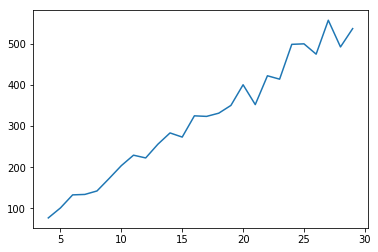

In [98]:
plt.plot(resultado['N_clust'].values,resultado['Distancia'].values) #k=5 optimo

In [99]:
resultado2

,N_clust,Umbral,Distancia,metodo
0,4,0,88.41763,kmeans


In [100]:
resultado3

,N_clust,Umbral,Distancia,metodo
0,4,0,76.60538,kmedoids


## Exportar resultados para kmedoids

In [101]:
resultadoskmedoids=kmedoids_alg(max(resultado3['N_clust']),sample)

In [102]:
resultadoskmedoids.head()

,GRUPO,Cliente_Id
1,0,34016703
110,0,2707743
109,0,33630908
108,0,40819636
107,0,14599034


In [103]:
resultadokmd = pd.merge(resultadoskmedoids,datosp,how='inner',left_on=['Cliente_Id'],right_on=['Cliente_Id'])

In [104]:
resultadokmd.to_csv('kmedoids_k3.csv')

## Exportar resultados para kmeans

In [105]:
resultadoskmeans=kmeans_alg(max(resultado2['N_clust']),sample)

In [106]:
resultadokm = pd.merge(resultadoskmeans,datosp,how='inner',left_on=['Cliente_Id'],right_on=['Cliente_Id'])

In [107]:
resultadokm.to_csv('kmeans_3.csv')